In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the dataset
df = pd.read_csv('animal_disease_dataset_try.csv')

In [39]:
# Prepare features (X) and target (y)
X = df[['Fever', 'Cough', 'Lethargy', 'Weight', 'Age']]
y = df['Disease']

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scale numerical features (Weight and Age)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Weight', 'Age']] = scaler.fit_transform(X_train[['Weight', 'Age']])
X_test_scaled[['Weight', 'Age']] = scaler.transform(X_test[['Weight', 'Age']])

In [55]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [56]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9335


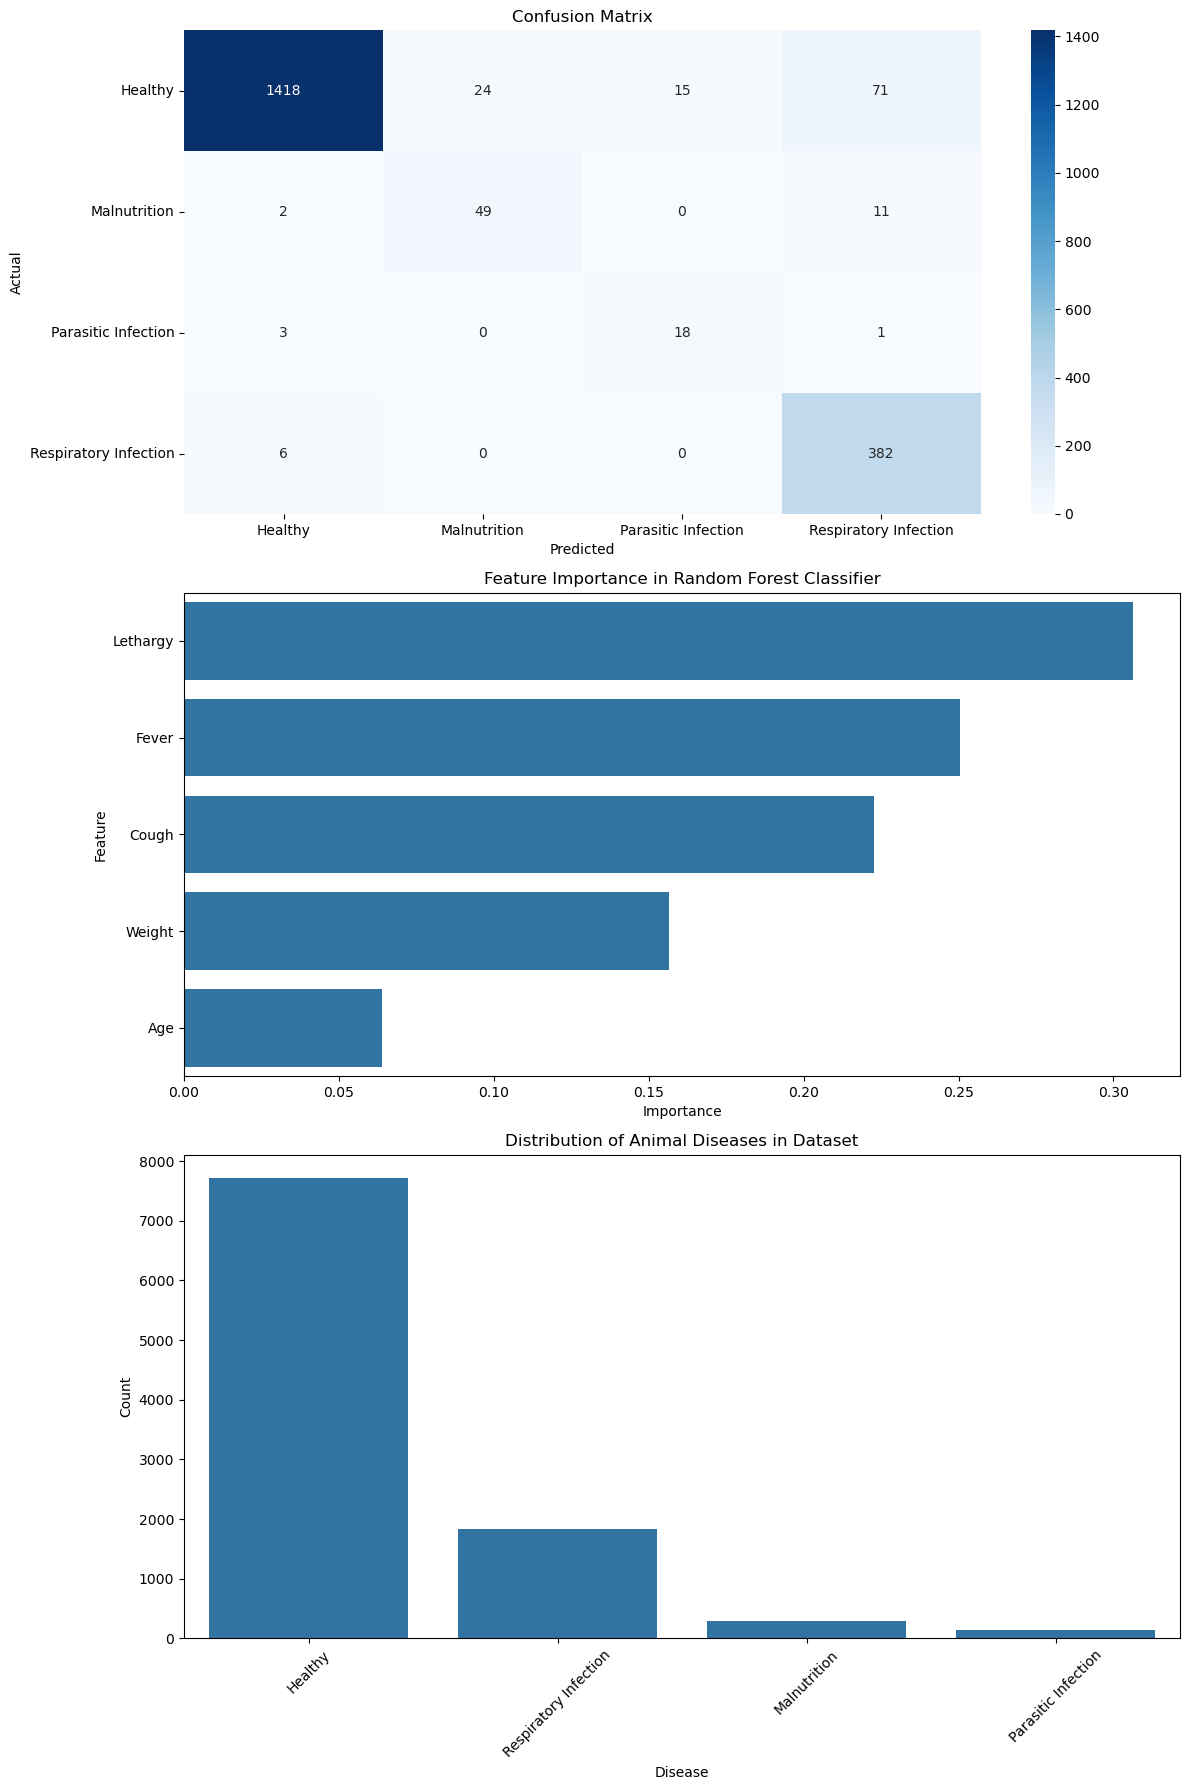

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=rf_model.classes_, 
                     columns=rf_model.classes_)

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Confusion Matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 2. Feature Importance
sns.barplot(x='importance', y='feature', data=feature_importance, ax=axes[1])
axes[1].set_title('Feature Importance in Random Forest Classifier')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')

# 3. Class Distribution
sns.countplot(data=df, x='Disease', order=df['Disease'].value_counts().index, ax=axes[2])
axes[2].set_title('Distribution of Animal Diseases in Dataset')
axes[2].set_xlabel('Disease')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
